In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls

drive  sample_data


In [4]:
%cd drive/MyDrive

/content/drive/MyDrive


In [5]:
import pandas as pd

subclass_annotations = pd.read_csv('20221030-011825_annot_df_sorted_subclassed_MLFs_32_slide_no_2.csv')

In [6]:
%cd MITOS_WSI_CMC/

/content/drive/MyDrive/MITOS_WSI_CMC


In [7]:
%cd databases

/content/drive/MyDrive/MITOS_WSI_CMC/databases


In [8]:
subclass_annotations.head()

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
0,0,1,1,"[21029, 7246]",[[21004 7221]\r\n [21054 7271]],1,05535b17-a3f3-48f9-ae21-dbf9617efcf1,8
1,172,1378,1378,"[12420, 28597]",[[12395 28572]\r\n [12445 28622]],1,39f4c617-c398-421b-a392-ba96a3e5c493,0
2,174,1380,1380,"[28407, 29819]",[[28382 29794]\r\n [28432 29844]],1,64827d9b-9de4-4672-a413-a0c58fee8bff,8
3,175,1381,1381,"[28124, 29658]",[[28099 29633]\r\n [28149 29683]],1,ebd10fc9-384f-450b-ab58-aed2869658c2,0
4,176,1382,1382,"[27694, 29623]",[[27669 29598]\r\n [27719 29648]],1,3b021804-0fe4-4b34-81ea-ee8be751cc8d,8


In [9]:
subclass_annotations = subclass_annotations.drop(['ctr', 'coord', 'guid'], axis = 1)

In [10]:
%cd ..
!ls

/content/drive/MyDrive/MITOS_WSI_CMC
databases		    README.md
data_loader.py		    results
Evaluation.ipynb	    RetinaNet-CMC-CODAEL.ipynb
Inference-RetinaNet-512.py  RetinaNet-CMC-MEL.ipynb
lib			    RetinaNet-CMC-ODAEL.ipynb
model			    Setup.ipynb
models			    title_CMC.png
PatchClassifier		    WSI
__pycache__


/content/drive/MyDrive/MITOS_WSI_CMC
0.png
2.png
1.png
3.png
4.png
6.png
5.png
7.png
8.png
9.png
10.png
11.png
12.png
13.png
15.png
14.png
16.png
129.png
130.png
132.png
133.png
134.png
135.png
137.png
136.png
138.png
140.png
142.png
141.png
145.png
144.png
146.png
147.png
151.png
149.png
154.png
155.png
156.png
157.png
162.png
158.png
163.png
191.png
164.png
194.png
192.png
196.png
197.png
198.png
17.png
19.png
18.png
20.png
21.png
23.png
24.png
22.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
37.png
36.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
57.png
58.png
56.png
59.png
60.png
62.png
61.png
63.png
64.png
65.png
66.png
68.png
67.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
78.png
76.png
77.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
92.png
93.png
91.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
1

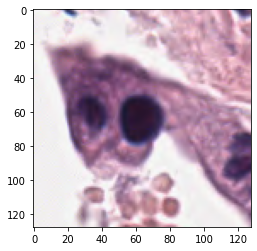

0       8
1       0
2       8
3       0
4       8
       ..
263    42
264    42
265    42
266    42
267    42
Name: subcl, Length: 268, dtype: int64


In [11]:
from numpy.core.multiarray import packbits
#Load FSL CSV
#Load images
!pwd
import os
from os import listdir
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

labels = subclass_annotations['subcl']
imagelist = []

# get the path/directory
folder_dir = "databases"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)
        temp = mpimg.imread('/content/drive/MyDrive/MITOS_WSI_CMC/databases/' + str(images))
        plt.imshow(temp)
        imagelist.append(temp)
#train_images, test_images = train_images / 255.0, test_images / 255.0

plt.imshow(imagelist[55])
plt.show()
print(labels)

In [12]:
import numpy as np



In [13]:
from sklearn.model_selection import train_test_split
X = imagelist.copy()
y = labels.copy()
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
len(X_train)

214

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 114,304
Trainable params: 114,304
Non-tr

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))
for layer in model.layers:
    print(layer.output_shape)

(None, 126, 126, 128)
(None, 63, 63, 128)
(None, 61, 61, 64)
(None, 30, 30, 64)
(None, 28, 28, 64)
(None, 50176)
(None, 64)
(None, 10)
(None, 10)
(None, 64)
(None, 7)
(None, 7)
(None, 64)
(None, 42)
(None, 42)
(None, 64)
(None, 43)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 1.9660 - accuracy: 0.8318 - val_loss: 0.6657 - val_accuracy: 0.8333
Epoch 2/10
7/7 [==============================] - 15s 2s/step - loss: 0.7092 - accuracy: 0.8832 - val_loss: 0.5770 - val_accuracy: 0.8333
Epoch 3/10
7/7 [==============================] - 15s 2s/step - loss: 0.5308 - accuracy: 0.8832 - val_loss: 0.4737 - val_accuracy: 0.8333
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 0.4994 - accuracy: 0.8832 - val_loss: 0.5035 - val_accuracy: 0.8333
Epoch 5/10
7/7 [==============================] - 15s 2s/step - loss: 0.4974 - accuracy: 0.8832 - val_loss: 0.5707 - val_accuracy: 0.8333
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.4850 - accuracy: 0.8832 - val_loss: 0.5022 - val_accuracy: 0.8333
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: 0.4259 - accuracy: 0.8832 - val_loss: 0.5087 - val_accuracy: 0.8333
Epoch 8/10
7/7 [==================

In [48]:
print((y_train[0]))

8


2/2 - 2s - loss: 0.4938 - accuracy: 0.8333 - 2s/epoch - 850ms/step
0.8333333134651184


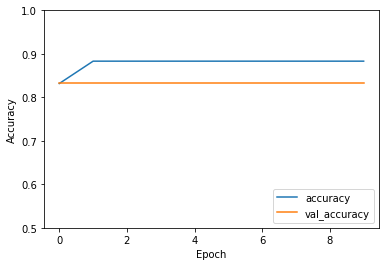

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)